# Python Liquidity
---

## Description

The following project compares the bid ask spreads and turnovers of various ETP crypto products. 

## How to use

 - The data file is a prerequisite for this code to run. The data file has to be in the same folder as this ipynb file or the pandas read excel function will not register. As of right now I have reduced the file name from ProductComparison.xlsx to pc.xlsx to make it easier. But depending on the file name, this line will change (I have commented down the lines that need to be changed).

 - Pandas and matplotlib were utilized in order to work with the data and plot the resulting figures.

 - There are two dictionaries in the beginning, the months were used to simplify the approach of dates, thus it does not need to be changed. However, sharename has been updated to the most current product tickers and their families. With the addition of new products, this needs to be updated with the format of 'Ticker':'Product Family'. 

 - The pdf function to output all the images as a single pdf needs to be changed. Currently, a package that identifies the size of the images and sizes them correctly has not been found. Will update soon but in the meantime have used smallpdf online in order to make a single pdf. 

 - Nothing else in this code needs to be changed as it will read all the files, name it accordingly, and output the data. The only thing to look out for is the product family which may not be shown in the legend of the graph. This is updated as of April, 2022. 
 
 * Note to make sure this works properly we just have to restart kernel and update all cells. 

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
dict_mnth = {
    1:'JAN',
    2:'FEB',
    3: 'MARCH',
    4: 'APRIL',
    5: 'MAY',
    6: 'JUNE',
    7: 'JULY',
    8: 'AUG',
    9: 'SEP',
    10: 'OCT',
    11: 'NOV',
    12: 'DEC'
}

# Update if need be
sharename = {'ABTC':'21Shares','2BTC':'21Shares','BITC':'Coinshares','SBTCU':'Seba','BTCEUSD':'ETC Group',
             'VBTC':'VanEck','BTCW':'WisdomTree','BTIC':'Invesco','XBTIUSD':'Iconic Physical','FBTC':'Fidelity',
             'BTCE':'ETC Group','XBTI':'Iconic Physical','YBTC':'Bitpanda','BT0X':'Global X','AETH':'21Shares',
            'ZETH':'ETC Group','VETH':'VanEck','SETH':'Seba','ETHW':'WisdomTree','ETHE':'Coinshares',
            'ETHA':'21Shares','CETH':'Coinshares','WETH':'WisdomTree','IETH':'Iconic Physical','ET0X':'Global X',
            'HODLV':'21Shares','HODLX':'21Shares','ALTS':'21Shares','ABBA':'21Shares','KEYS':'21Shares','BOLD':'21Shares',
            'WALT':'WisdomTree','BLOC':'WisdomTree','MEGA':'WisdomTree','MOON':'21Shares','HODL':'21Shares','21XH':'21Shares',
            'ALTC':'21Shares','WBLC':'WisdomTree','WMEG':'WisdomTree','ADOT':'21Shares','VDOT':'VanEck','PLKA':'ETC Group',
            'CDOT':'Coinshares','TDOT':'Bitpanda','DOTVA':'Valour','ASOL':'21Shares','ESOL':'ETC Group','VSOL':'VanEck',
            'TSOL':'Bitpanda','SOLVA':'Valour'}

In [2]:
# Read all sheets in your File (***File name should be changed***)
df = pd.read_excel('pc_06_22.xlsx', sheet_name=None)

In [3]:
imagelist = []
for name  in list(df)[1:]:
    t = '_'.join(name.split())+ '_turnover' +'.png'
    a = '_'.join(name.split())+ '_averagebid' +'.png'
    imagelist.append((t,a))

In [4]:
imagelist = sum(imagelist,())

In [5]:
imagelist

('SIX_Bitcoin_ETPs_turnover.png',
 'SIX_Bitcoin_ETPs_averagebid.png',
 'Xetra_Bitcoin_ETPs_turnover.png',
 'Xetra_Bitcoin_ETPs_averagebid.png',
 'ENX_Paris_Bitcoin_ETPs_turnover.png',
 'ENX_Paris_Bitcoin_ETPs_averagebid.png',
 'ENX_Amsterdam_Bitcoin_ETPs_turnover.png',
 'ENX_Amsterdam_Bitcoin_ETPs_averagebid.png',
 'SIX_Ethereum_ETPs_turnover.png',
 'SIX_Ethereum_ETPs_averagebid.png',
 'Xetra_Ethereum_ETPs_turnover.png',
 'Xetra_Ethereum_ETPs_averagebid.png',
 'ENX_Paris_Ethereum_ETPs_turnover.png',
 'ENX_Paris_Ethereum_ETPs_averagebid.png',
 'ENX_Amsterdam_Ethereum_ETPs_turnover.png',
 'ENX_Amsterdam_Ethereum_ETPs_averagebid.png',
 'SIX_Baskets_turnover.png',
 'SIX_Baskets_averagebid.png',
 'Xetra_Baskets_turnover.png',
 'Xetra_Baskets_averagebid.png',
 'ENX_Paris_Baskets_turnover.png',
 'ENX_Paris_Baskets_averagebid.png',
 'ENX_Amsterdam_Baskets_turnover.png',
 'ENX_Amsterdam_Baskets_averagebid.png',
 'SIX_Polkadot_ETPs_turnover.png',
 'SIX_Polkadot_ETPs_averagebid.png',
 'Xetra_Polk

In [6]:
df_all = [pd.DataFrame([])]
for i,sheet_name in enumerate(df.keys()):
    if sheet_name!='Summary':
        # file name should be changed
        data = pd.read_excel('pc_06_22.xlsx', sheet_name=sheet_name)
        df_all.append((data,sheet_name))

In [7]:
def get_columns(sheet_df):
    imp_col = ['Dates']
    for i in list(sheet_df.iloc[0]):
        if isinstance(i,str):
            name = i.split()[0]
            
            name = sharename.get(name,'') + ' ' + name
            name = name.strip()
            
            imp_col.append(name+' TURNOVER')
            imp_col.append(name+' AVERAGE_BID')
    return imp_col

In [8]:
def preprocess(sheet_df):
    sheet_df.columns = get_columns(sheet_df)
    sheet_df = sheet_df.iloc[2:262]
    sheet_df.reset_index(drop=True,inplace=True)

    sheet_df['Dates'] = pd.to_datetime(sheet_df['Dates'])

    for col in list(sheet_df)[1:]:
        sheet_df[col] = sheet_df[col].astype('float')

    sheet_df['Year'] = sheet_df['Dates'].dt.year 
    sheet_df['Month'] = sheet_df['Dates'].dt.month 
    return sheet_df

In [9]:
def plot_turnover(sheet_df,sheet_name):
    
    figname = '_'.join(sheet_name.split())+ '_turnover' +'.png'
    
    turnover_col = [name for name in list(sheet_df) if 'TURNOVER' in name]
    sheet_df_new = sheet_df.groupby(['Year','Month'])[turnover_col].sum()
    sheet_df_new = sheet_df_new.reset_index()

    yr_month = []
    for _,row in sheet_df_new.iterrows():

        yr_month.append(str(row['Year']).split('.')[0]+'_'+dict_mnth[row['Month']])

    sheet_df_new['yr_month'] = yr_month

    fig, ax = plt.subplots(figsize=(16,8))
    # turnover_col = [name for name in list(sheet1_df_new) if 'TURNOVER' in name]
    new_name = sheet_df_new['yr_month'].iloc[[0,2,4,6,8,10,11]]
    for col in turnover_col:
        ax.plot(list(range(len(sheet_df_new))),list(sheet_df_new[col]),label=col)
    ax.set_xticklabels(new_name)
    #ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.ticklabel_format(style='plain', axis='y')

    plt.legend(bbox_to_anchor=(1.0,1.0))
    plt.title(sheet_name+' Turnover')
    plt.xlabel("Date")
    plt.ylabel("Sum of Turnover ($)")
    plt.savefig(figname, bbox_inches = "tight")
    plt.show()

In [10]:
def plot_average_bid(sheet_df,sheet_name):
    figname = '_'.join(sheet_name.split())+ '_averagebid' +'.png'
    
    bid_col = [name for name in list(sheet_df) if 'AVERAGE_BID' in name]

    sheet_df_bid = sheet_df.groupby(['Year','Month'])[bid_col].mean()*100
    sheet_df_bid = sheet_df_bid.reset_index()

#     c = ['gold','c','darkgreen','g','b','lightblue','darkblue','brown','grey']

    #######################################################################
    turnover_col = [name for name in list(sheet_df) if 'TURNOVER' in name]
    sheet_df_new = sheet_df.groupby(['Year','Month'])[turnover_col].sum()
    sheet_df_new = sheet_df_new.reset_index()

    yr_month = []
    for _,row in sheet_df_new.iterrows():

        yr_month.append(str(row['Year']).split('.')[0]+'_'+dict_mnth[row['Month']])

    sheet_df_new['yr_month'] = yr_month
    #######################################################################
    
    fig, ax = plt.subplots(figsize=(16,8))
    new_name = sheet_df_new['yr_month'].iloc[[0,2,3,4,5,6,8,10,11]]
#     print(sheet_df_new['yr_month'])
    for i,col in enumerate(bid_col):
        ax.plot(list(range(len(sheet_df_bid))),list(sheet_df_bid[col]),label=col)
    ax.set_xticklabels(new_name)
    plt.legend(bbox_to_anchor=(1.0,1.0))
    plt.title(sheet_name+' Average Bid Ask Spread')
    plt.xlabel("Date")
    plt.ylabel("Average Bid Ask Spread (bps)")
    plt.ylim([0,100])
    plt.savefig(figname,bbox_inches = "tight")
    plt.show()

# Plotting

Sheet_1


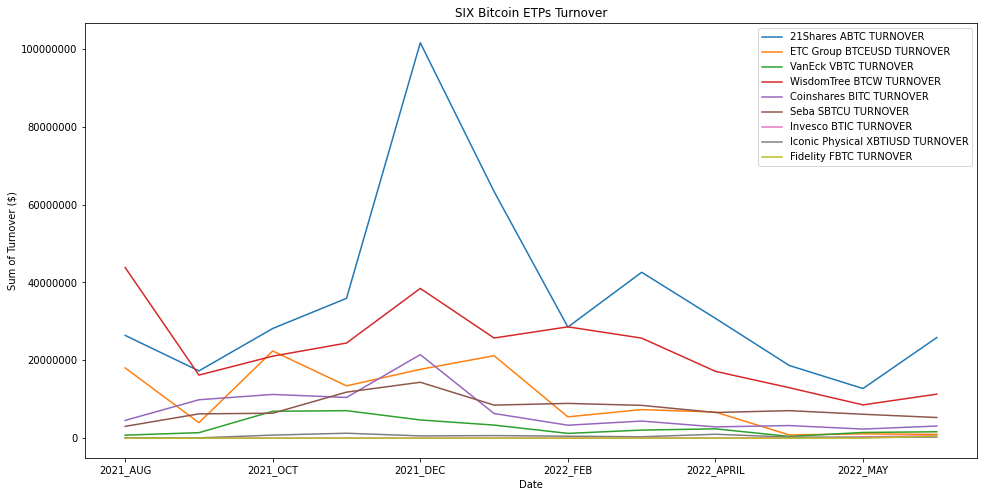

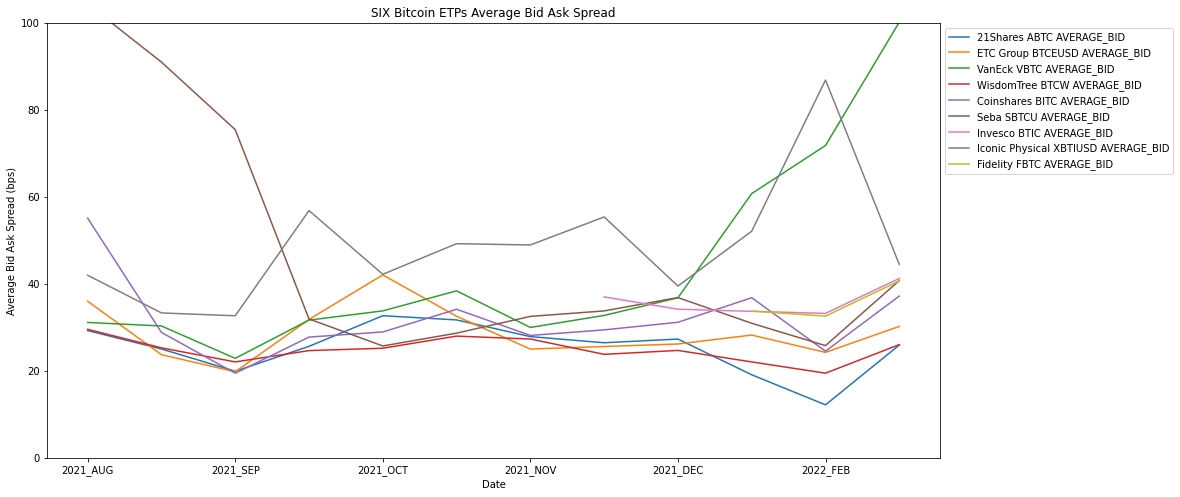

Sheet_2


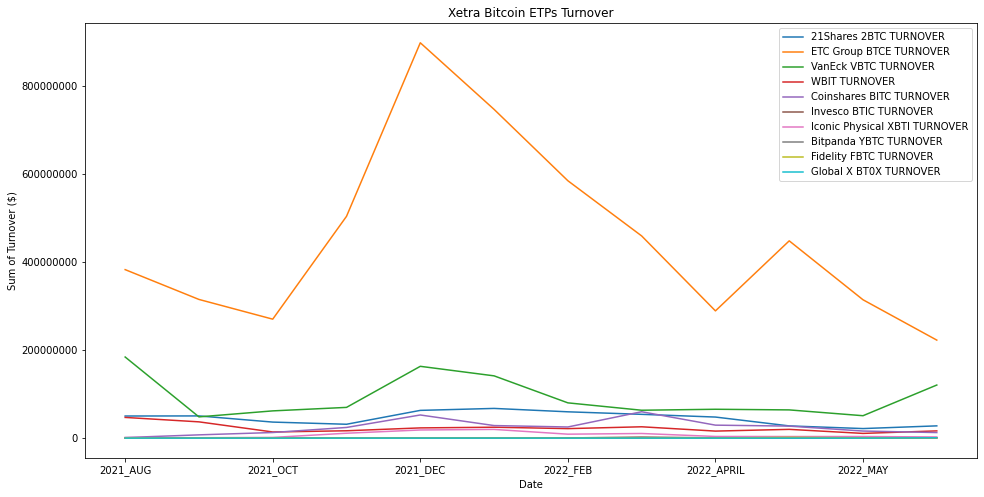

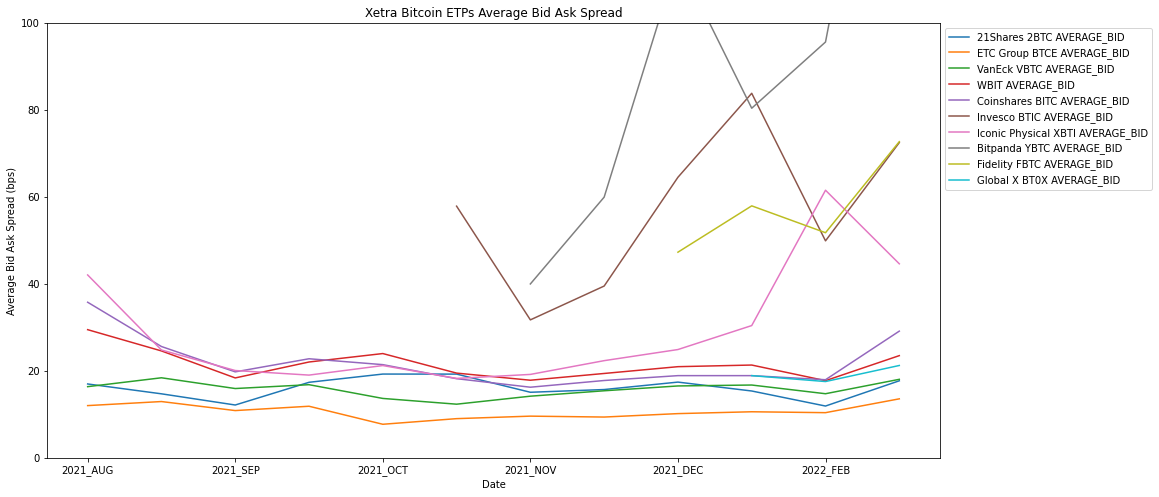

Sheet_3


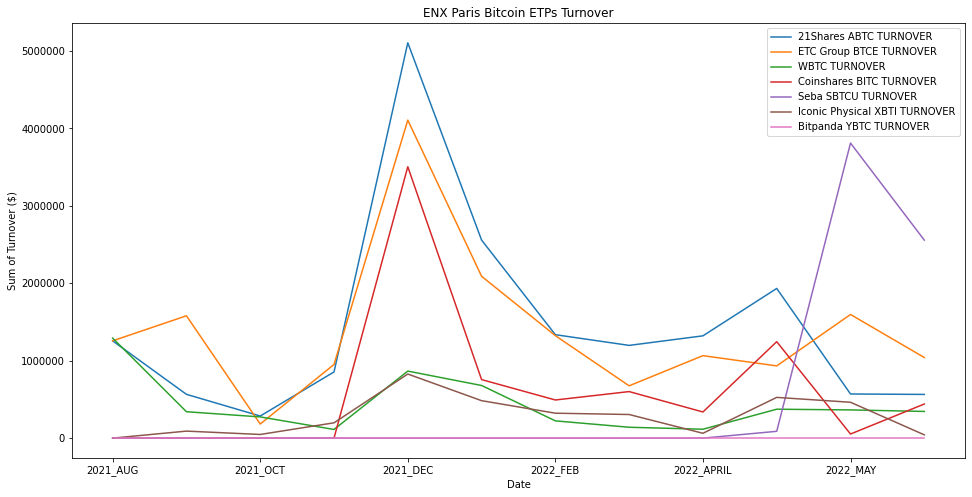

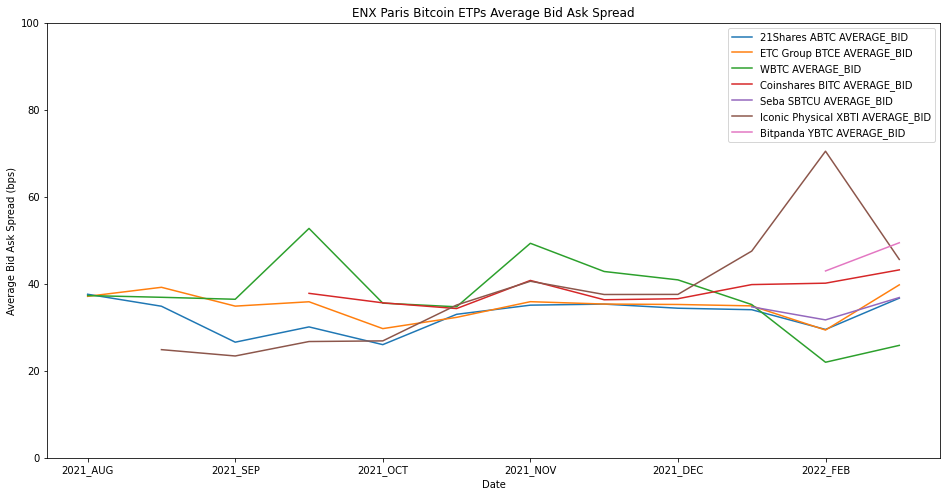

Sheet_4


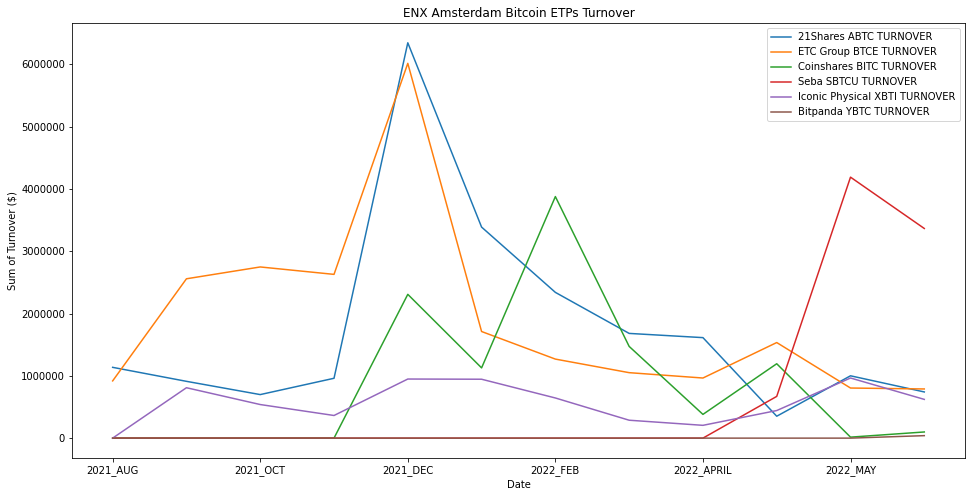

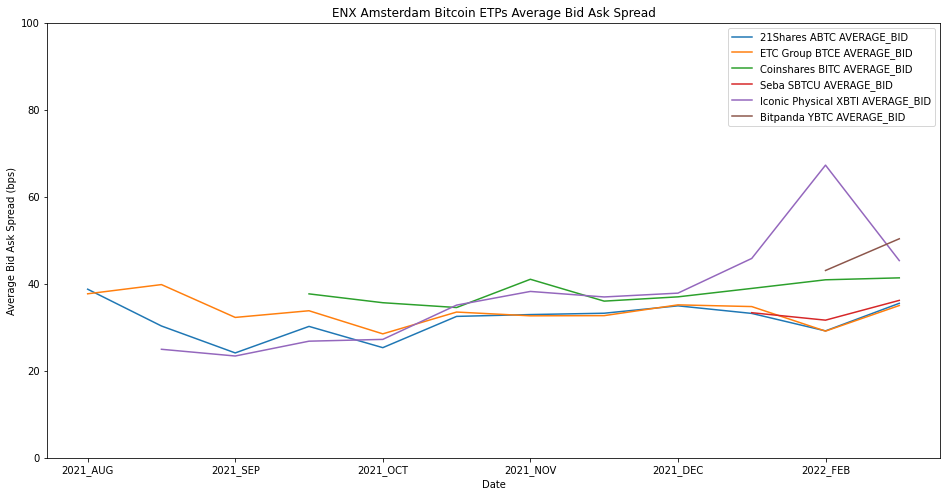

Sheet_5


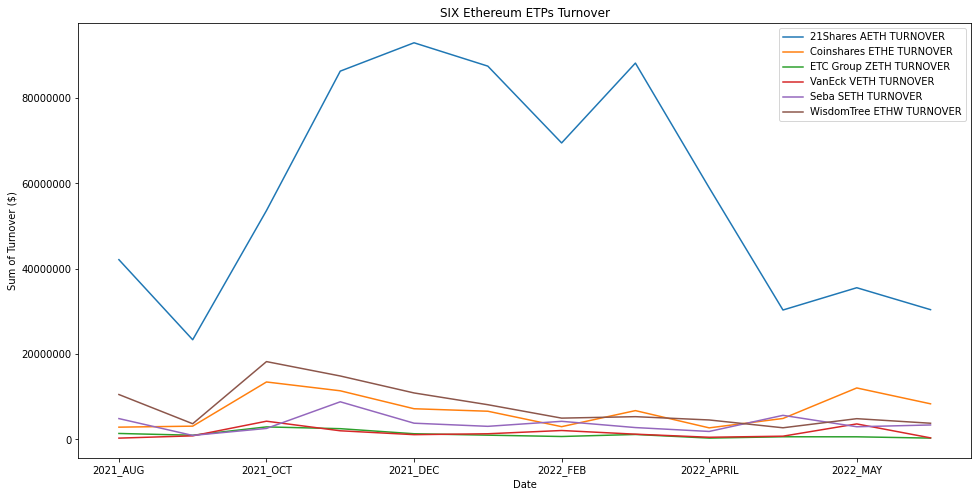

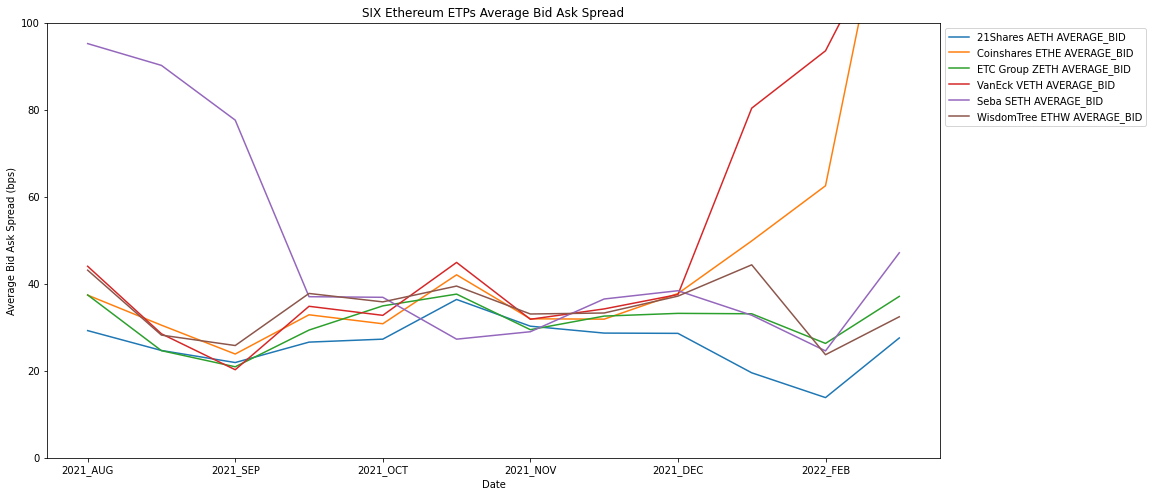

Sheet_6


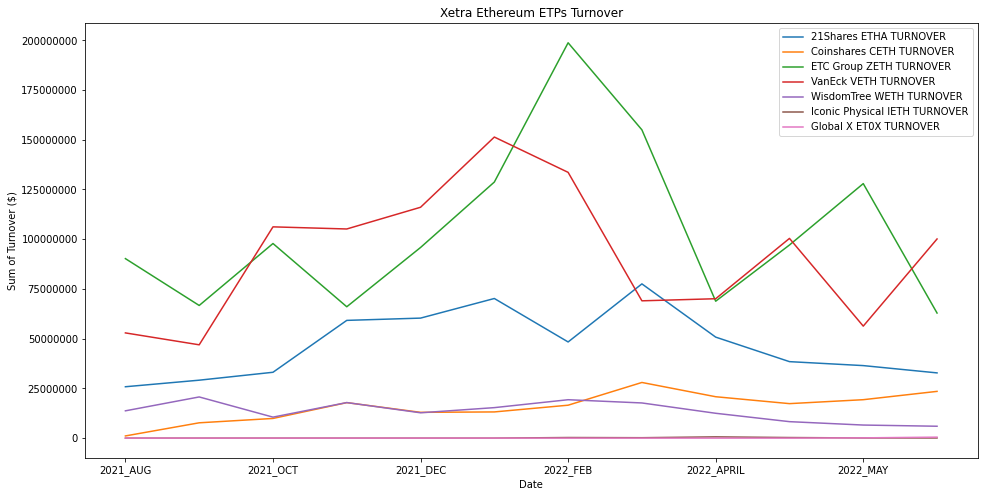

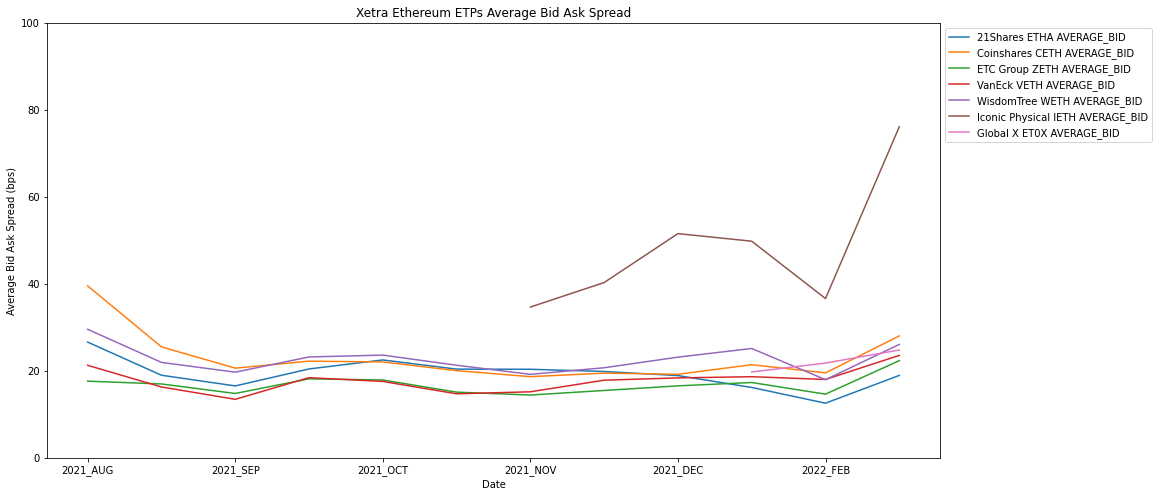

Sheet_7


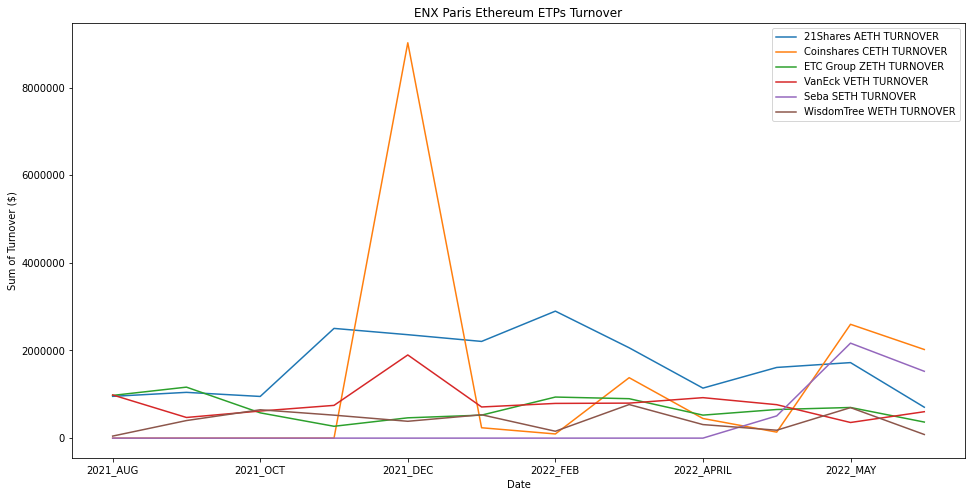

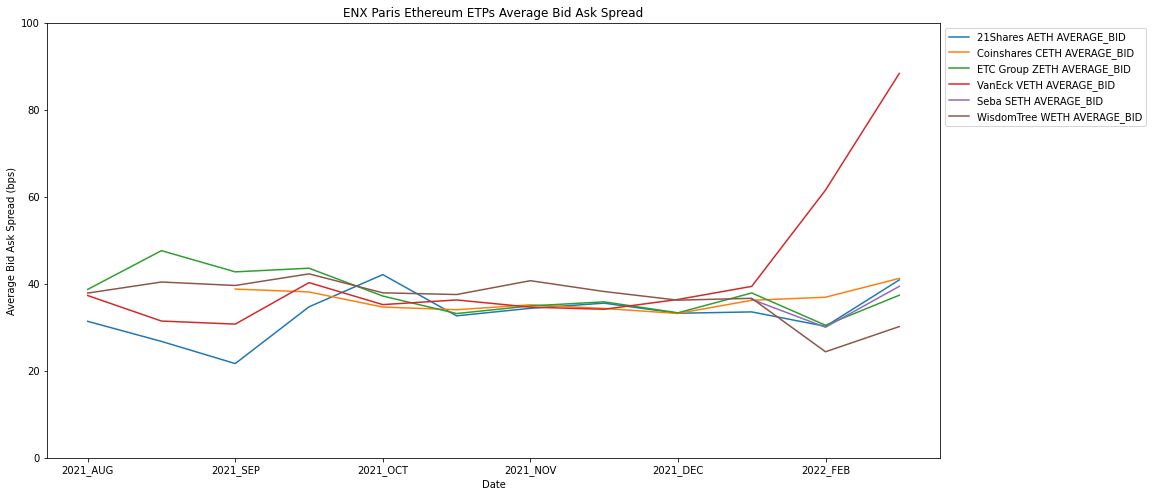

Sheet_8


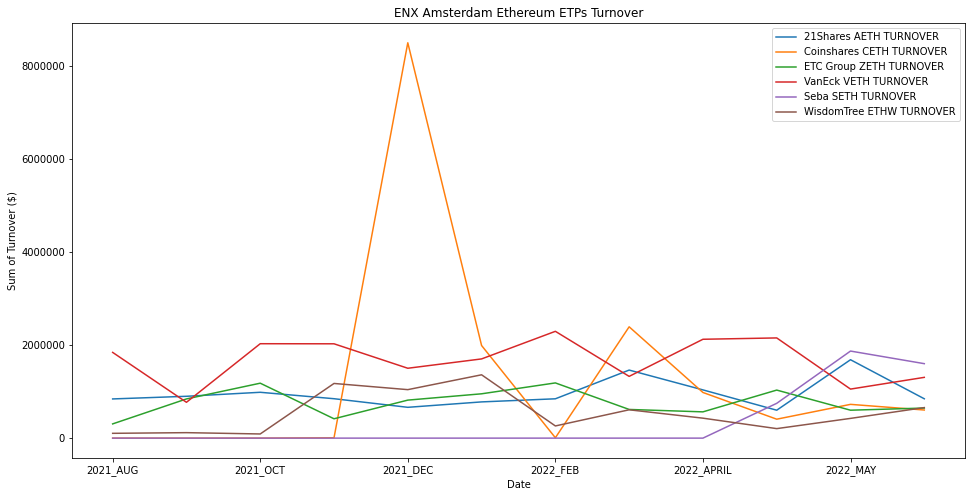

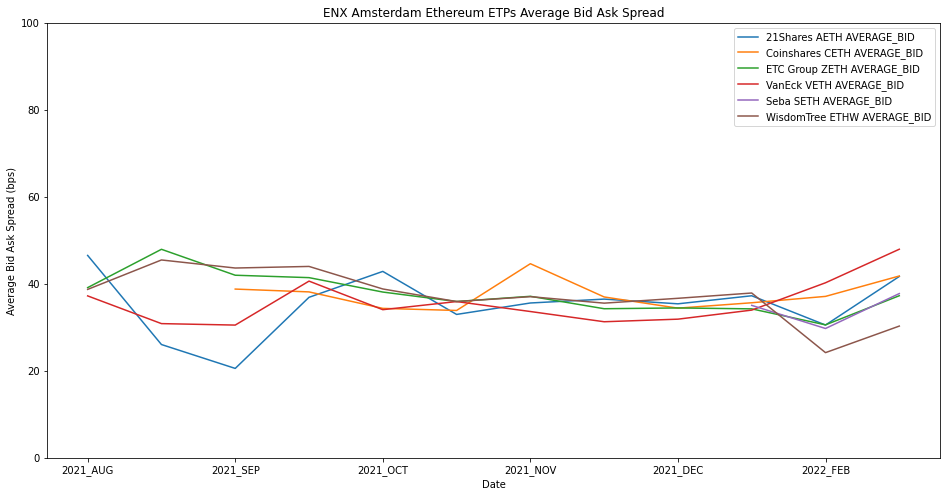

Sheet_9


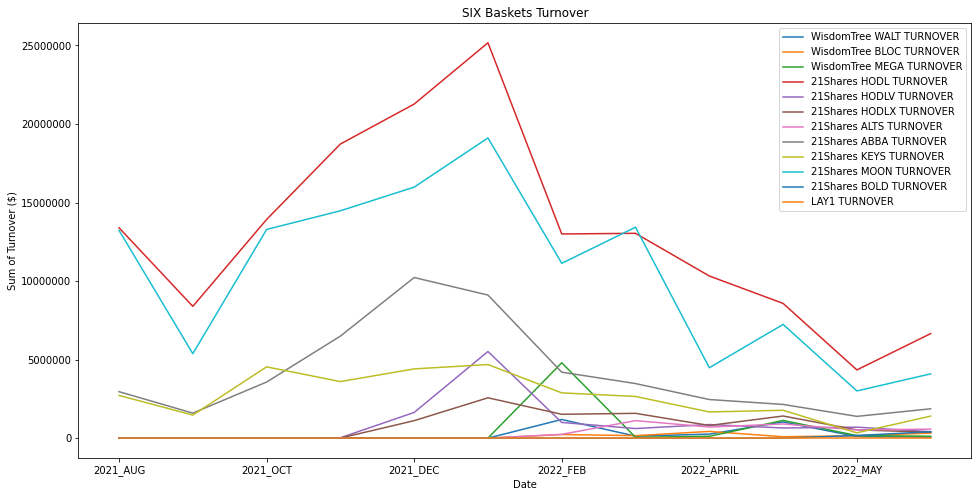

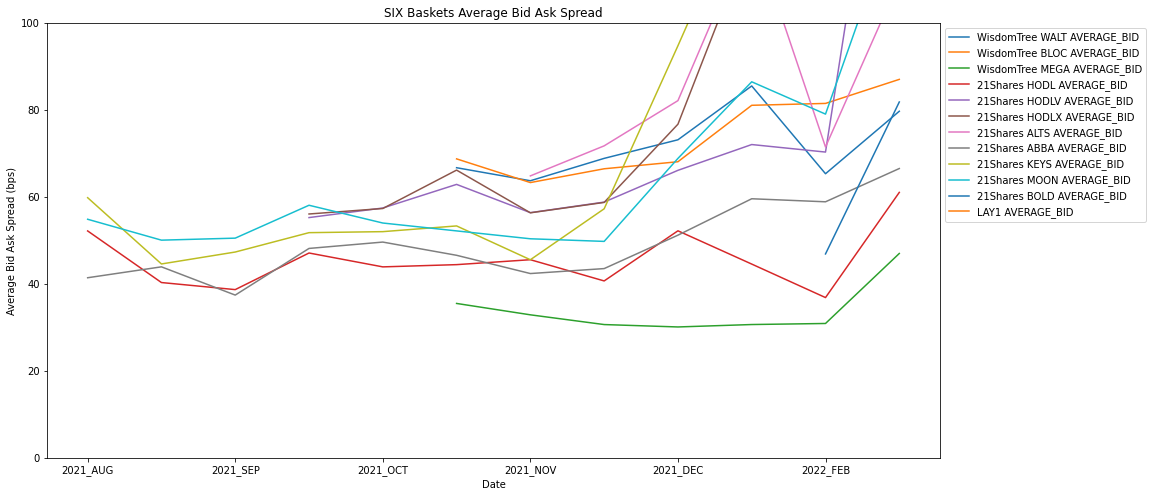

Sheet_10


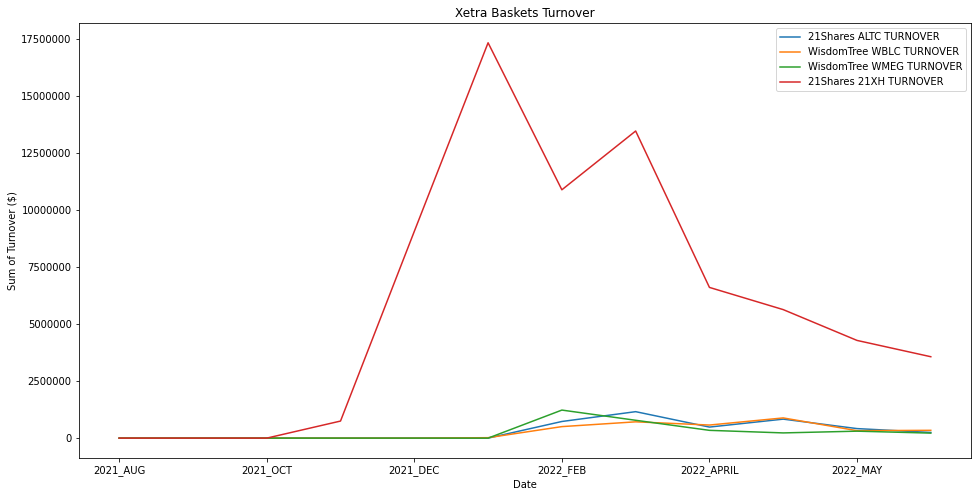

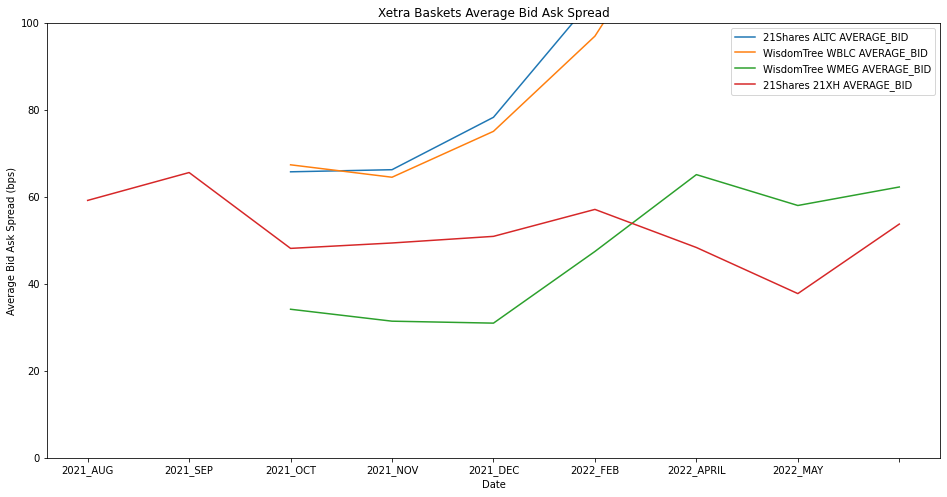

Sheet_11


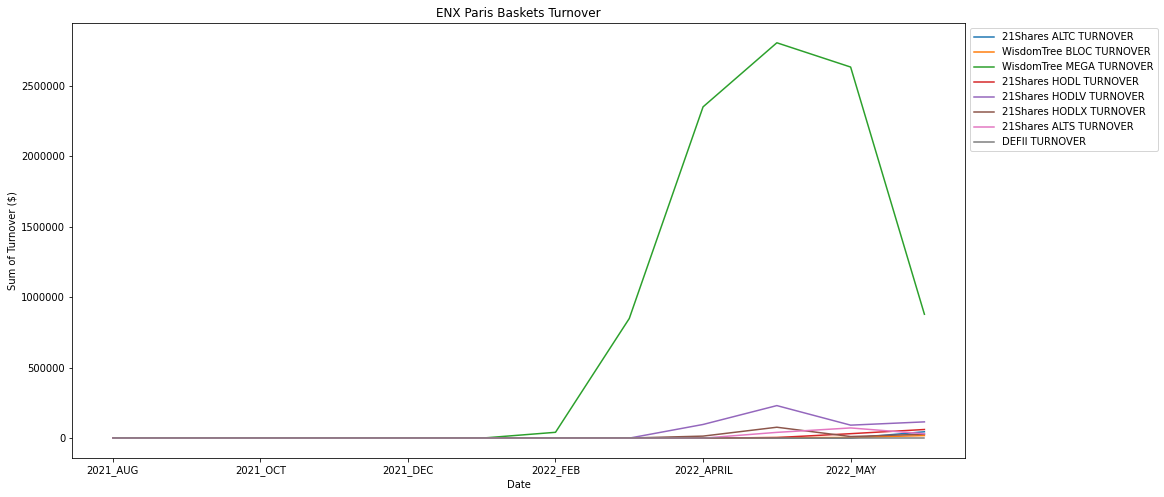

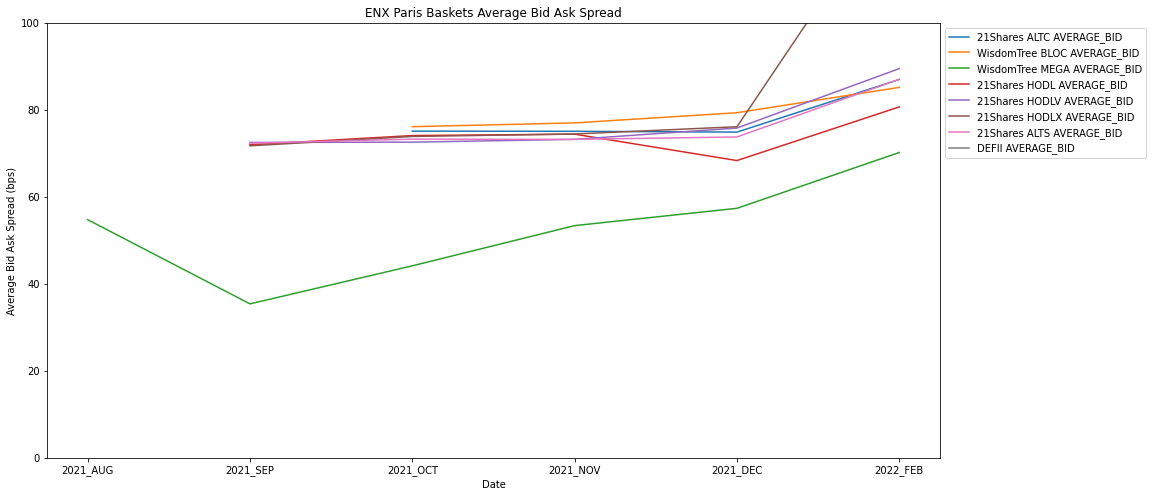

Sheet_12


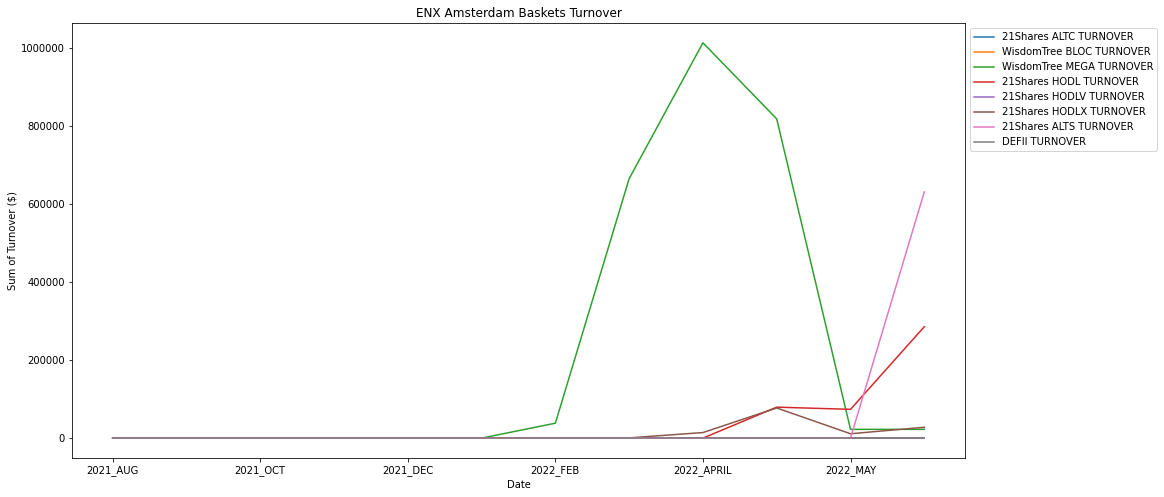

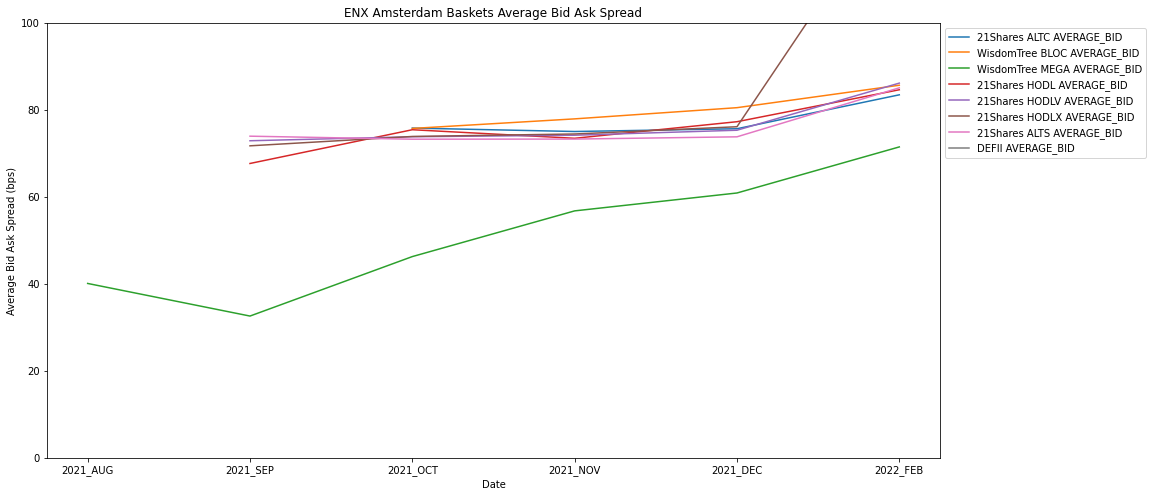

Sheet_13


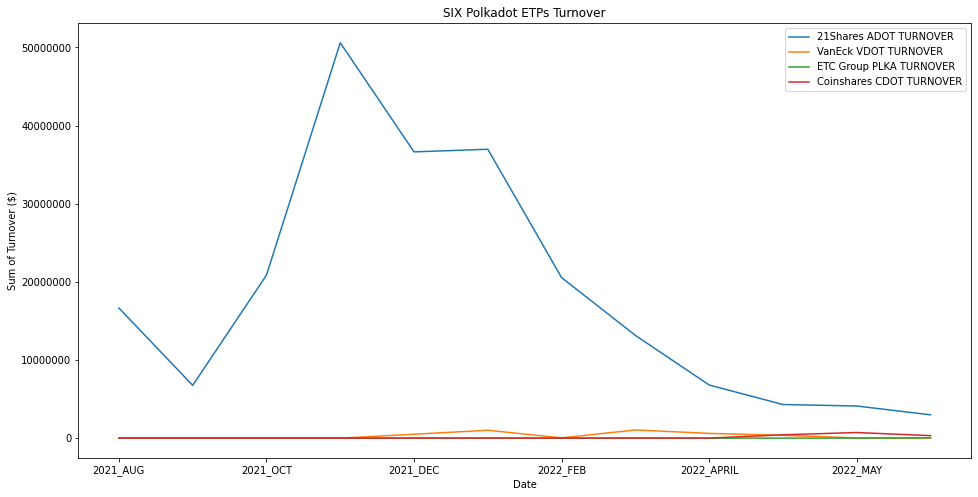

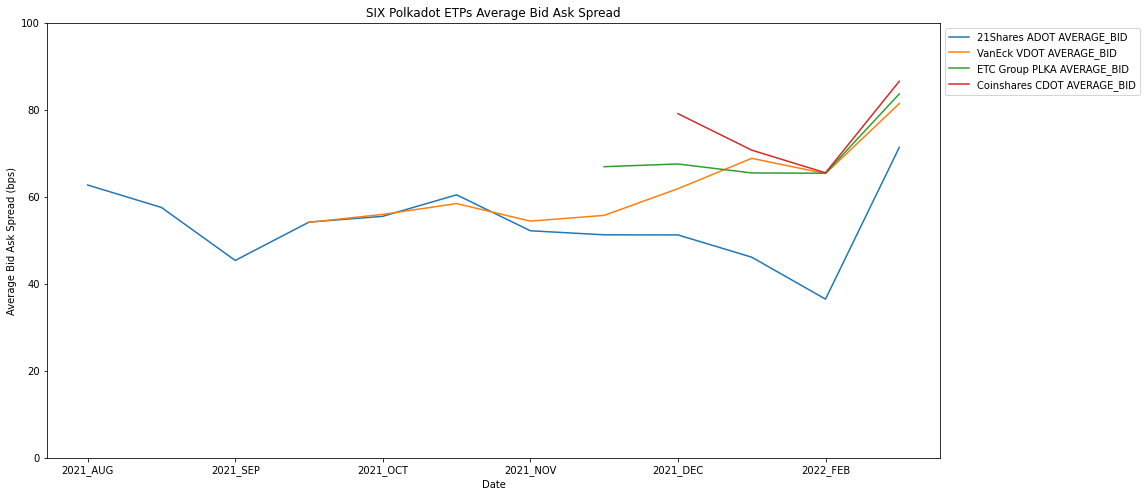

Sheet_14


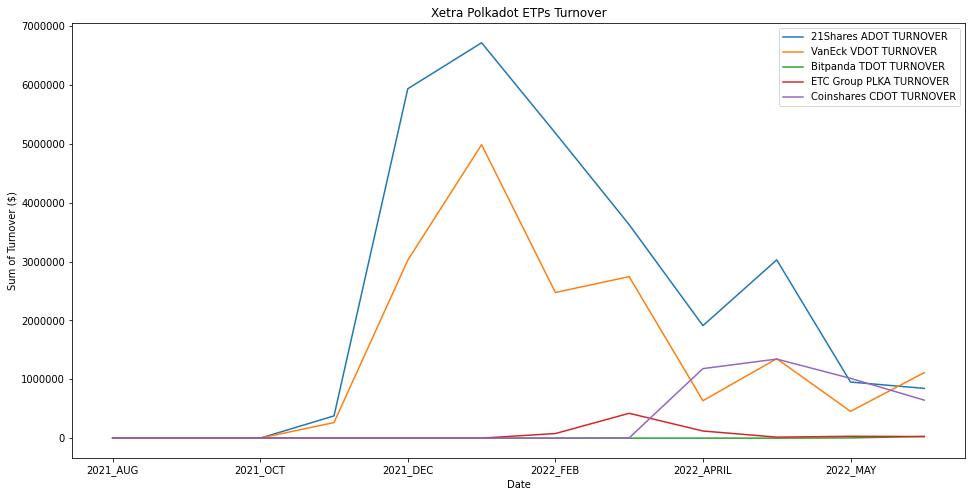

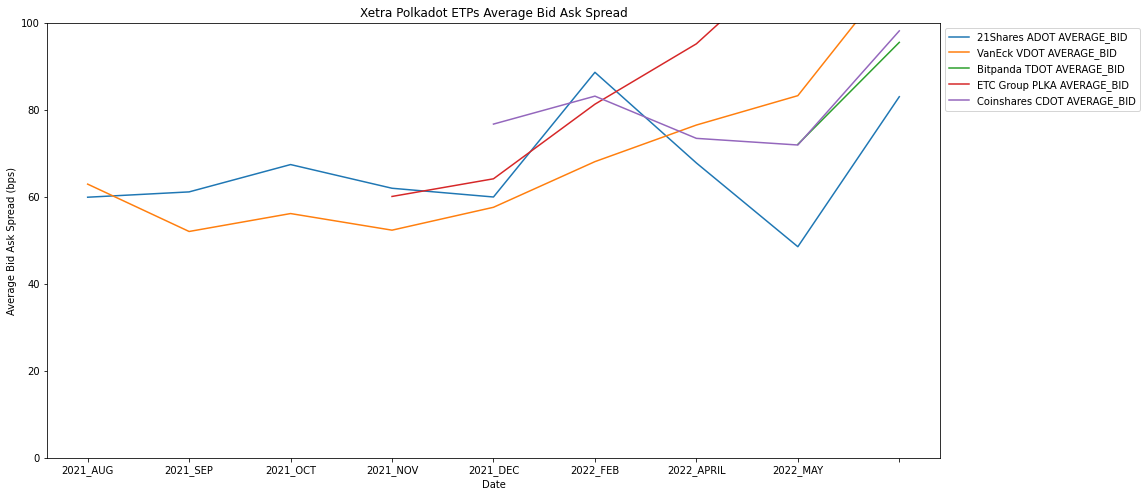

Sheet_15


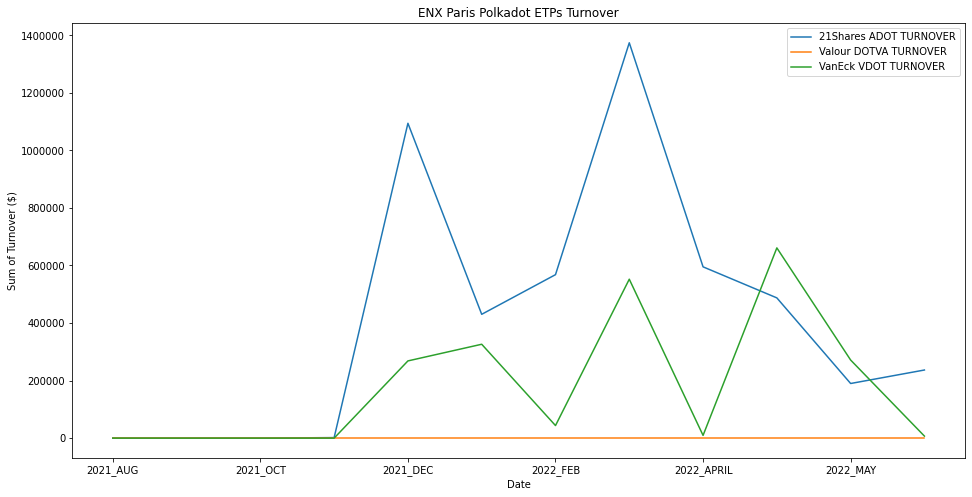

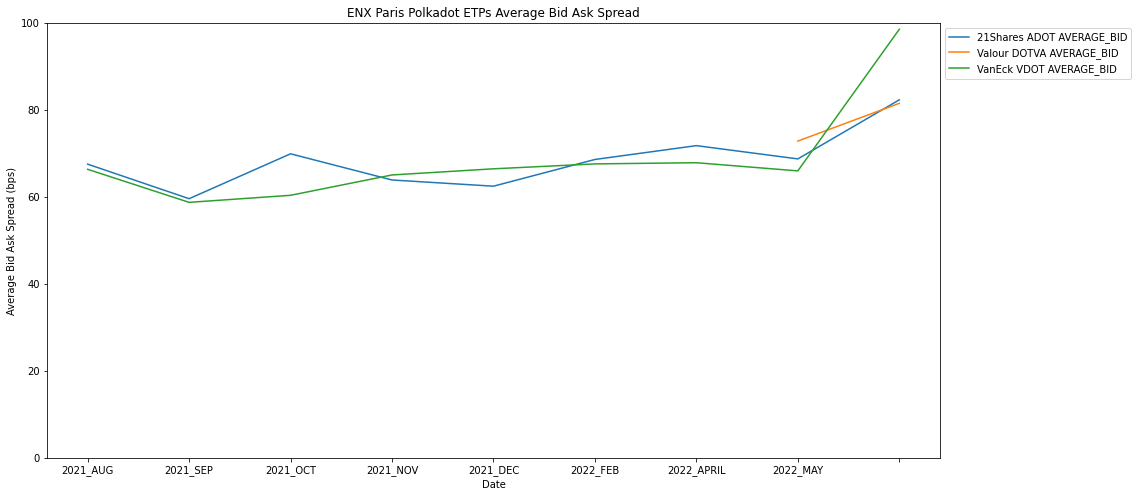

Sheet_16


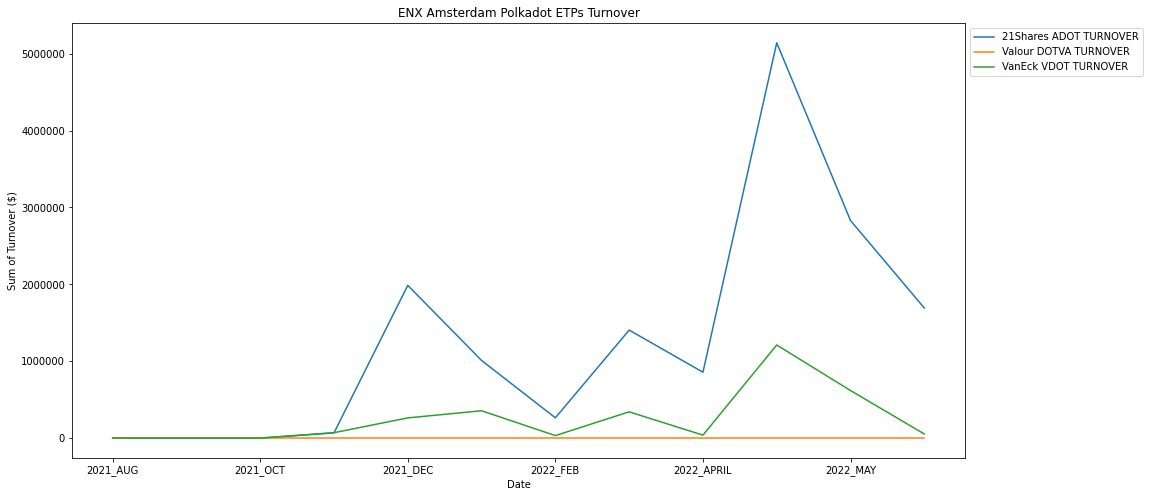

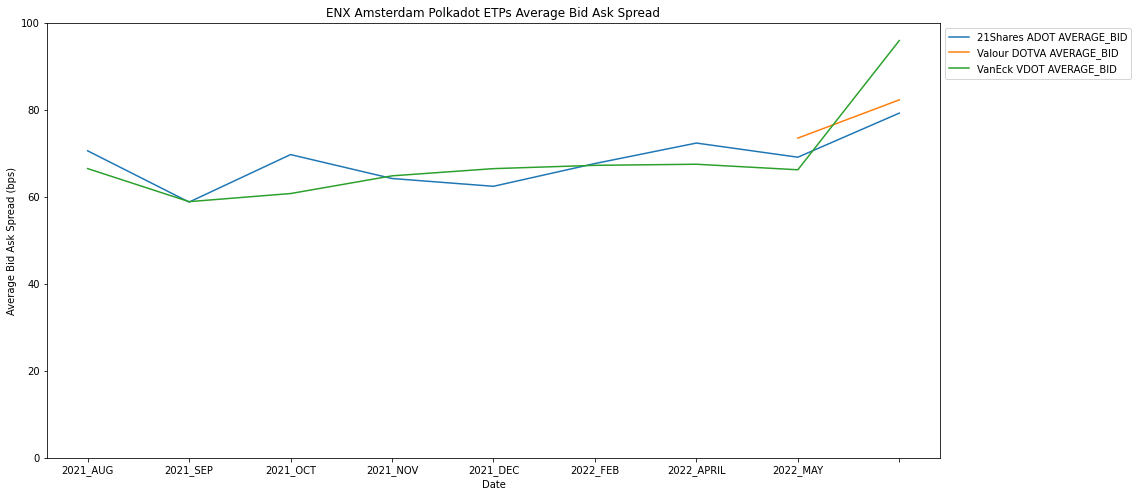

Sheet_17


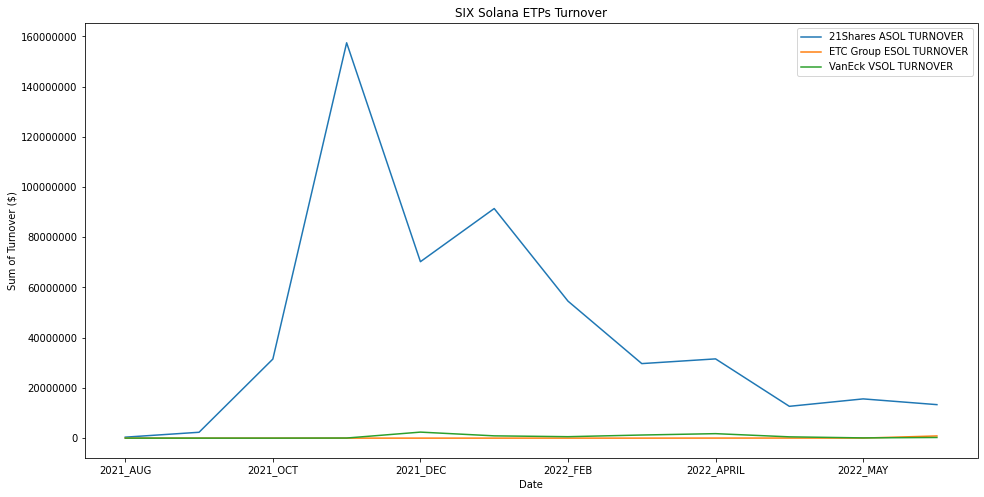

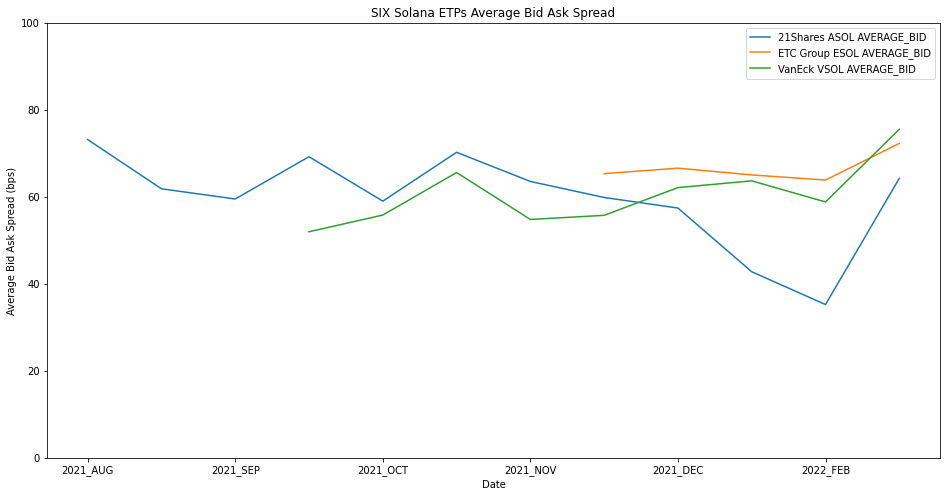

Sheet_18


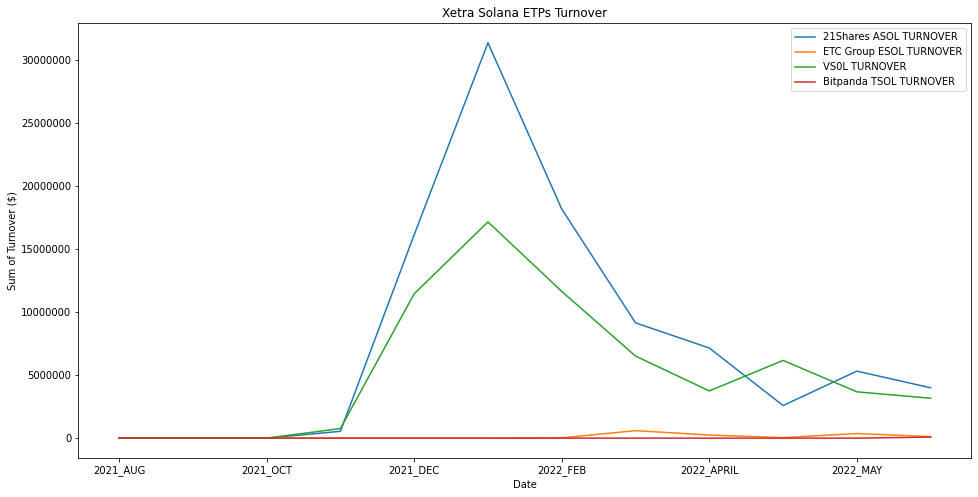

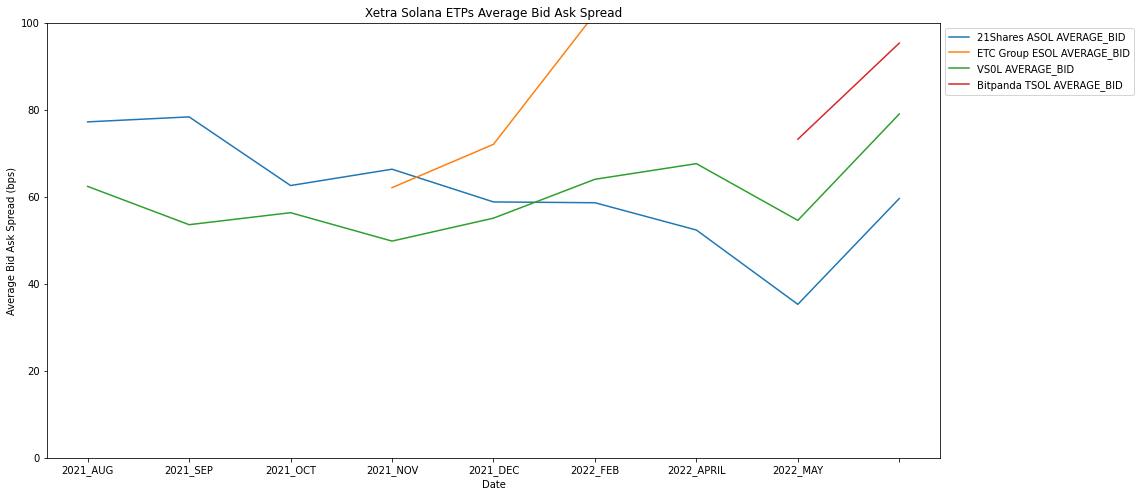

Sheet_19


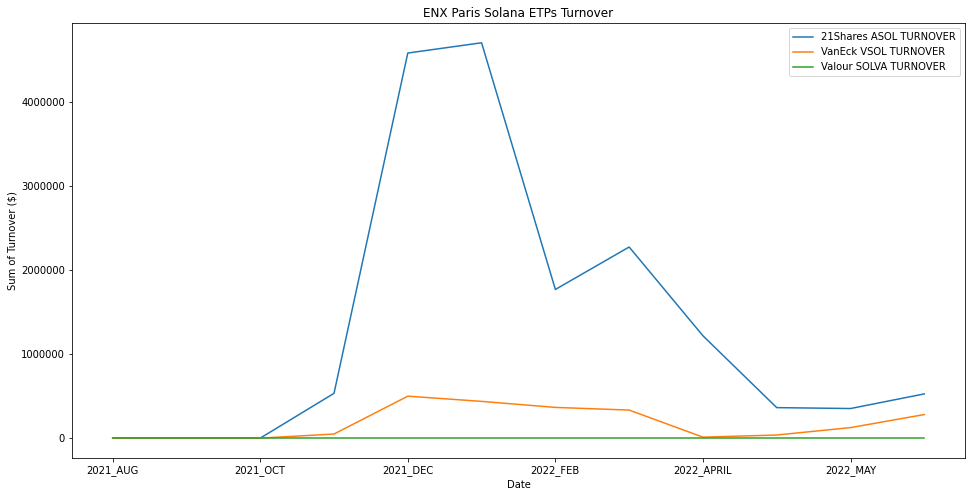

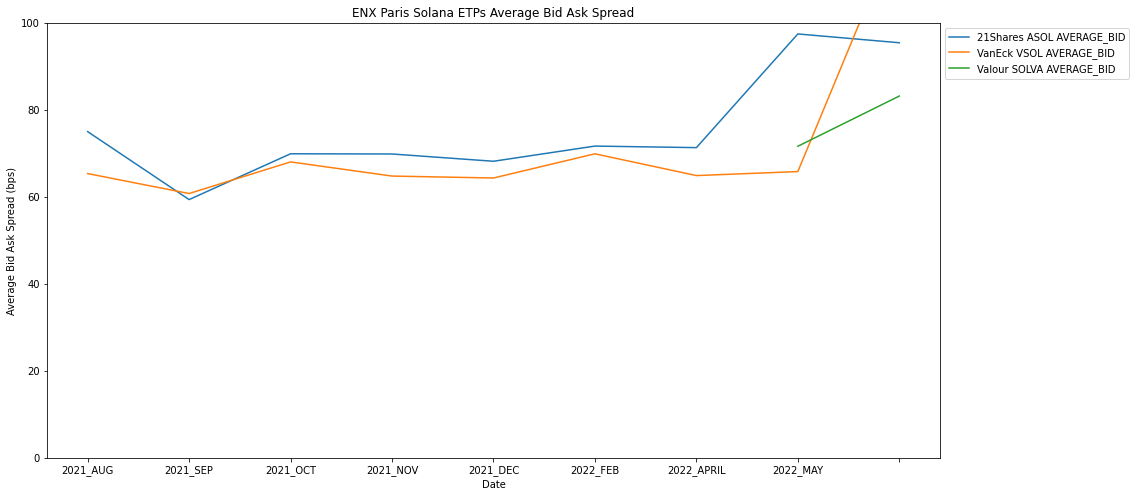

Sheet_20


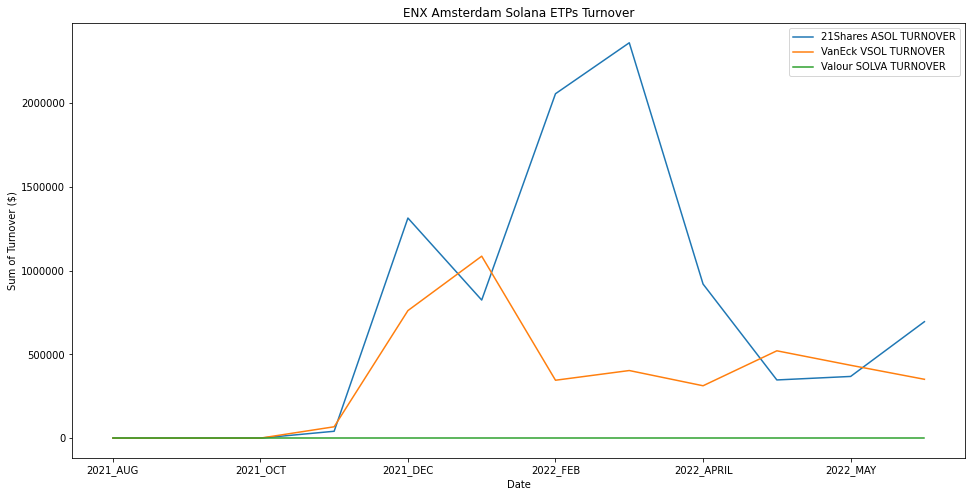

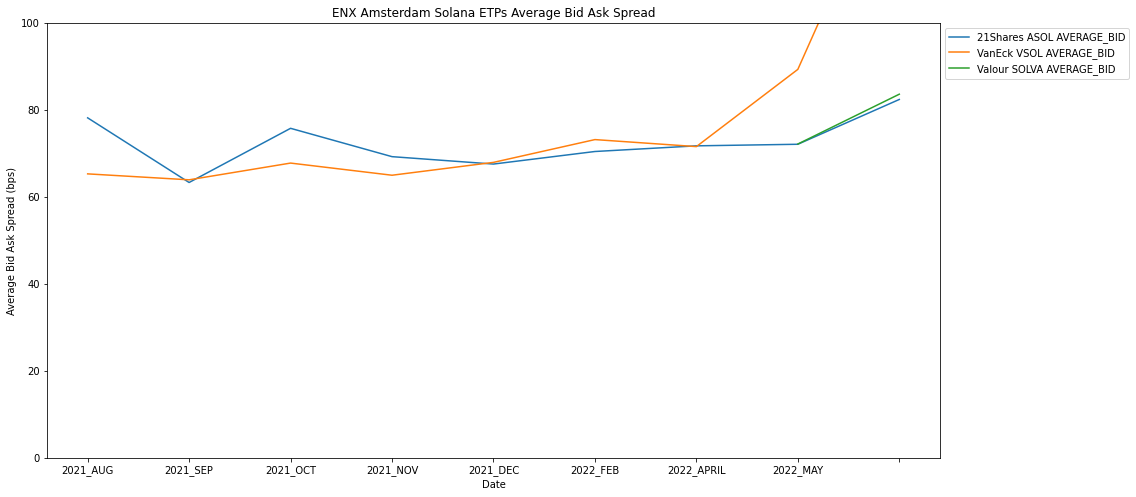

In [11]:
count = 1
for df,name in df_all[1:]:
    df_temp = preprocess(df)
    print(f'Sheet_{count}')
    count = count + 1
    plot_turnover(df_temp,name)
    plot_average_bid(df_temp,name)

In [12]:
!pip install python-docx

You should consider upgrading via the 'C:\Users\KevinKang\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [13]:
from docx import Document
from docx.shared import Inches
from docx.enum.text import WD_ALIGN_PARAGRAPH

document = Document('21Shares CM - Word template.docx')

heading = document.add_heading('Product Comparison', 0)

#p = document.add_paragraph('The following project compares the bid ask spreads and turnovers of various Crypto ETP products. ')

heading.paragraph_format.line_spacing = 5
document.add_picture('SIX_Bitcoin_ETPs_turnover.png', width=Inches(6.0))
first_paragraph = document.paragraphs[-1]
first_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
first_paragraph.paragraph_format.line_spacing = 5
document.add_picture('SIX_Bitcoin_ETPs_averagebid.png', width=Inches(6.0))
last_paragraph = document.paragraphs[-1] 
last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
document.add_page_break()

document.add_picture('Xetra_Bitcoin_ETPs_turnover.png', width=Inches(6.0))
first_paragraph = document.paragraphs[-1]
first_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
first_paragraph.paragraph_format.line_spacing = 5
document.add_picture('Xetra_Bitcoin_ETPs_averagebid.png', width=Inches(6.0))
last_paragraph = document.paragraphs[-1] 
last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
document.add_page_break()

document.add_picture('ENX_Paris_Bitcoin_ETPs_turnover.png', width=Inches(6.0))
first_paragraph = document.paragraphs[-1]
first_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
first_paragraph.paragraph_format.line_spacing = 5
document.add_picture('ENX_Paris_Bitcoin_ETPs_averagebid.png', width=Inches(6.0))
last_paragraph = document.paragraphs[-1] 
last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
document.add_page_break()

document.add_picture('ENX_Amsterdam_Bitcoin_ETPs_turnover.png', width=Inches(6.0))
first_paragraph = document.paragraphs[-1]
first_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
first_paragraph.paragraph_format.line_spacing = 5
document.add_picture('ENX_Amsterdam_Bitcoin_ETPs_averagebid.png', width=Inches(6.0))
last_paragraph = document.paragraphs[-1] 
last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
document.add_page_break()

document.add_picture('SIX_Ethereum_ETPs_turnover.png', width=Inches(6.0))
first_paragraph = document.paragraphs[-1]
first_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
first_paragraph.paragraph_format.line_spacing = 5
document.add_picture('SIX_Ethereum_ETPs_averagebid.png', width=Inches(6.0))
last_paragraph = document.paragraphs[-1] 
last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
document.add_page_break()

document.add_picture('Xetra_Ethereum_ETPs_turnover.png', width=Inches(6.0))
first_paragraph = document.paragraphs[-1]
first_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
first_paragraph.paragraph_format.line_spacing = 5
document.add_picture('Xetra_Ethereum_ETPs_averagebid.png', width=Inches(6.0))
last_paragraph = document.paragraphs[-1] 
last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
document.add_page_break()

document.add_picture('ENX_Paris_Ethereum_ETPs_turnover.png', width=Inches(6.0))
first_paragraph = document.paragraphs[-1]
first_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
first_paragraph.paragraph_format.line_spacing = 5
document.add_picture('ENX_Paris_Ethereum_ETPs_averagebid.png', width=Inches(6.0))
last_paragraph = document.paragraphs[-1] 
last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
document.add_page_break()

document.add_picture('ENX_Amsterdam_Ethereum_ETPs_turnover.png', width=Inches(6.0))
first_paragraph = document.paragraphs[-1]
first_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
first_paragraph.paragraph_format.line_spacing = 5
document.add_picture('ENX_Amsterdam_Ethereum_ETPs_averagebid.png', width=Inches(6.0))
last_paragraph = document.paragraphs[-1] 
last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
document.add_page_break()

document.add_picture('SIX_Baskets_turnover.png', width=Inches(6.0))
document.add_page_break()
document.add_picture('SIX_Baskets_averagebid.png', width=Inches(6.0))
document.add_page_break()

document.add_picture('Xetra_Baskets_turnover.png', width=Inches(6.0))
document.add_page_break()
document.add_picture('Xetra_Baskets_averagebid.png', width=Inches(6.0))
document.add_page_break()

document.add_picture('ENX_Paris_Baskets_turnover.png', width=Inches(6.0))
document.add_page_break()
document.add_picture('ENX_Paris_Baskets_averagebid.png', width=Inches(6.0))
document.add_page_break()

document.add_picture('ENX_Amsterdam_Baskets_turnover.png', width=Inches(6.0))
document.add_page_break()
document.add_picture('ENX_Amsterdam_Baskets_averagebid.png', width=Inches(6.0))
document.add_page_break()

document.add_picture('SIX_Polkadot_ETPs_turnover.png', width=Inches(6.0))
document.add_page_break()
document.add_picture('SIX_Polkadot_ETPs_averagebid.png', width=Inches(6.0))
document.add_page_break()

document.add_picture('Xetra_Polkadot_ETPs_turnover.png', width=Inches(6.0))
document.add_page_break()
document.add_picture('Xetra_Polkadot_ETPs_averagebid.png', width=Inches(6.0))
document.add_page_break()

document.add_picture('ENX_Paris_Polkadot_ETPs_turnover.png', width=Inches(6.0))
document.add_page_break()
document.add_picture('ENX_Paris_Polkadot_ETPs_averagebid.png', width=Inches(6.0))
document.add_page_break()

document.add_picture('ENX_Amsterdam_Polkadot_ETPs_turnover.png', width=Inches(6.0))
document.add_page_break()
document.add_picture('ENX_Amsterdam_Polkadot_ETPs_averagebid.png', width=Inches(6.0))
document.add_page_break()

document.save('input.docx')

In [14]:
from docx2pdf import convert

convert("input.docx")
convert("input.docx", "output.pdf")


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

com_error: (-2147352567, 'Exception occurred.', (0, 'Microsoft Word', 'The file appears to be corrupted.', 'wdmain11.chm', 25272, -2146822496), None)